# **From Minimum Wage to Modern Warfare - Impacts on Concentration of Wealth**

## About the Author

George Marché<br>
Email: gmarc002@odu.edu<br>
LinkedIn: https://www.linkedin.com/in/george-marche-mscs

## Abstract - Objective and Approach

The objective behind this project is to predict if change in U.S. foreign intervention, government military expenditure, marginal top bracket tax rate, or minimum wage has an effect on income inequality and the overall concentration of wealth, with primary focus on the top 1% wealthiest people in the United States. 

Ultimately, the goal to measure if there is a correlation between a change in these statistics and the change in wealth concentration and determine how impactful political and economic policies are on income inequality. It would be nice to produce an input system to allow one to enter values for these attributes and get a prediction from the program as far as the concentration is concerned.

I plan to approach this by using most - if not all - methods that we've learned throughout the course. Since the course information followed a logical order through its module order, I will attempt to follow that.

The current time frame of coverage will be between 1913 and 2012, which is the earliest final year of data from one of my datasets. I was considering supplementing that lack of that more recent data with other datasets, but this may cause disorganization and confusing as there would be a need to keep track of exactly which data comes from which source.

## Introduction - The People's Struggle

Since the early twentieth century, if not since the founding of this country, the working class has found itself in a consistent fight with those who own the factories and reap the rewards of their labor. Laborers have sustained unsafe working conditions, child labor, low wages, and long hours.

To add to that, America has established itself as a hegemonic military powerhouse, with over 750 bases established in at least 80 countries$^1$. America has placed itself at the forefront and involved itself in, at a minimum, dozens of domestic and international conflicts, with impacts on both the opposing side in question and the American people themselves.

The socioeconomic and militaristic history of the United States is not easy to quantify and predict, as there are several factors. However, getting a big picture from several attributes is still possible, and can still be a method of solidifying an argument in a discussion regarding equitability of wealth and political and economic discourse.

$^1$https://www.aljazeera.com/news/2021/9/10/infographic-us-military-presence-around-the-world-interactive). 



## The [Dirty] Datasets

### Wealth Concentration Dataset **(Primary)**

**Wealth Inequality in the United States since 1913: Evidence from Capitalized Income Tax Data (with E. Saez)<br>
Gabriel Zucman (Associate Professor of Economics, UC Berkeley)<br>**
URL: http://gabriel-zucman.eu/uswealth/

There are percentages for various ranges of wealth ownership, from bottom 90% to top 0.01%, with even the margin that's in between (e.g. "Top 10% to 5%). This will give us the opportunity to predict the change of other wealth classes as well.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

wealth_data = pd.read_csv("pct_wealth.csv")
wealth_data.head(10)

,Year,Bottom 90%,Top 10%,Top 5%,Top 1%,Top 0.5%,Top 0.1%,Memo: top 0.1% with offshore assets,Top 0.01%,Top 10% to 1%,Top 10% to 5%,Top 5% to 1%,Top 1% to 0.1%,Top 1% to 0.5%,Top 0.5% to 0.1%,Top 0.1% to 0.01%
0,1913,NaN,NaN,NaN,44.00%,39.20%,22.50%,22.50%,8.80%,NaN,NaN,NaN,21.50%,4.80%,16.70%,13.70%
1,1914,NaN,NaN,NaN,44.10%,39.30%,22.20%,22.20%,9.20%,NaN,NaN,NaN,21.90%,4.80%,17.10%,13.00%
2,1915,NaN,NaN,NaN,43.80%,39.20%,23.30%,23.30%,11.10%,NaN,NaN,NaN,20.50%,4.50%,15.90%,12.20%
3,1916,NaN,NaN,NaN,42.70%,37.10%,24.80%,24.80%,11.40%,NaN,NaN,NaN,17.90%,5.60%,12.30%,13.40%
4,1917,20.50%,79.50%,67.30%,41.10%,34.80%,22.00%,22.00%,9.40%,38.40%,12.20%,26.20%,19.10%,6.20%,12.80%,12.60%
5,1918,22.20%,77.80%,64.70%,37.40%,30.20%,17.60%,17.70%,7.00%,40.40%,13.10%,27.30%,19.80%,7.20%,12.50%,10.60%
6,1919,20.60%,79.40%,67.20%,40.00%,32.40%,18.50%,18.50%,6.90%,39.40%,12.10%,27.30%,21.50%,7.60%,13.90%,11.50%
7,1920,22.70%,77.30%,62.70%,35.60%,28.30%,15.00%,15.00%,5.10%,41.70%,14.50%,27.10%,20.60%,7.30%,13.30%,9.90%
8,1921,22.60%,77.40%,63.00%,35.90%,28.60%,15.10%,15.10%,4.90%,41.50%,14.40%,27.00%,20.90%,7.30%,13.50%,10.20%
9,1922,21.40%,78.60%,65.20%,39.10%,31.50%,17.20%,17.20%,6.00%,39.50%,13.40%,26.10%,21.90%,7.60%,14.40%,11.10%


In [ ]:
wealth_data.dtypes

Year                                    int64
Bottom 90%                             object
Top 10%                                object
Top 5%                                 object
Top 1%                                 object
Top 0.5%                               object
Top 0.1%                               object
Memo: top 0.1% with offshore assets    object
Top 0.01%                              object
Top 10% to 1%                          object
Top 10% to 5%                          object
Top 5% to 1%                           object
Top 1% to 0.1%                         object
Top 1% to 0.5%                         object
Top 0.5% to 0.1%                       object
Top 0.1% to 0.01%                      object
dtype: object

### Defense Spending Dataset

**20th Century Defense Spending**<br>
URL: https://www.usgovernmentspending.com/spending_chart_1900_2020USk_22s2li011lcny_30f_20th_Century_Defense_Spending

This dataset contains data on the GDP, population size, and defense spending (inflation adjusted for the 2012 dollar value). Figures for GDP aren't available until 1930.

In [ ]:
defense_data = pd.read_csv("defense_spending.csv")
defense_data

,20th Century Defense Spending,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Year,GDP-US $ billion 2012,Population-US million,Defense - Federal $ billion 2012,NaN
1,1900,"<a href=http://www.measuringworth.com/usgdp"">M...",76.212,7.66,a
2,1901,"<a href=http://www.measuringworth.com/usgdp"">M...",77.68,7.74,a
3,1902,"<a href=http://www.measuringworth.com/usgdp"">M...",79.176,6.69,a
4,1903,"<a href=http://www.measuringworth.com/usgdp"">M...",80.701,6.58,i
...,...,...,...,...,...
132,Data Sources for 2020:,NaN,NaN,NaN,NaN
133,"GDP, GO:",https://usgovernmentspending.blogspot.com/sear...,"GDP, GO Sources",NaN,NaN
134,Federal:,https://www.govinfo.gov/app/collection/budget/...,"Fed. Budget: Hist. Tables 3.2, 5.1, 7.1",NaN,NaN
135,State and Local:,https://www.census.gov/programs-surveys/gov-fi...,State and Local Gov. Finances,NaN,NaN


In [ ]:
defense_data.dtypes

20th Century Defense Spending    object
Unnamed: 1                       object
Unnamed: 2                       object
Unnamed: 3                       object
Unnamed: 4                       object
dtype: object

### Minimum Wage Dataset

**Minimum Wage Accounting for inflation**<br>
URL: https://www.saving.org/inflation/facts/minimum-wage

Data on the minimum wage from inception of the policy (1938) until 2016, with values of the original set amount and the amount adjusted for 2021 dollars.

In [ ]:
minwage_data = pd.read_csv("minimum_wage.csv")
minwage_data.head(10)

,Year,Minimum Wage,In 2021 Dollars
0,2016,$7.25,$7.98
1,2015,$7.25,$8.04
2,2014,$7.25,$8.10
3,2013,$7.25,$8.22
4,2012,$7.25,$8.37
5,2011,$7.25,$8.62
6,2010,$7.25,$8.74
7,2009,$7.25,$8.98
8,2008,$6.55,$8.12
9,2007,$5.85,$7.55


In [ ]:
minwage_data.dtypes

Year                int64
Minimum Wage       object
In 2021 Dollars    object
dtype: object

### Top Marginal Tax Rate Dataset

**Historical Highest Marginal Income Tax Rate**<br>
URL: https://www.taxpolicycenter.org/statistics/historical-highest-marginal-income-tax-rates

The data originally came in an odd formation, with three columns of rows of data. I set it so there is only one actual data item in each row.

In [ ]:
toptax_data = pd.read_csv("top_marginal_tax_rate.csv")
toptax_data.head(10)

,Year,Top Marginal Tax Rate
0,1913,7.00%
1,1914,7.00%
2,1915,7.00%
3,1916,15.00%
4,1917,67.00%
5,1918,77.00%
6,1919,73.00%
7,1920,73.00%
8,1921,73.00%
9,1922,58.00%


In [ ]:
toptax_data.dtypes

Year                      int64
Top Marginal Tax Rate    object
dtype: object

### U.S. Interventions Dataset

**From Wounded Knee to Syria - U.S. Military Interventions Since 1890**<br>
URL: https://sites.evergreen.edu/zoltan/interventions/

There are a lot of U.S. interventions that occurred both domestically and internationally. The dataset goes to 1890, but I cut it to only 1913. It is uncertain whether this list is comprehensive and covers all incidents of intervention.

In [ ]:
usinter_data = pd.read_csv("us_interventions.csv")
usinter_data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,COUNTRY OR STATE,Dates of intervention,Forces,Comments
1,MEXICO,1913,Naval,Americans evacuated during revolution.
2,DOMINICAN REPUBLIC,1914,Naval,Fight with rebels over Santo Domingo.
3,COLORADO,1914,Troops,Breaking of miners’ strike by Army.
4,MEXICO,1914-18,"Naval, troops",Series of interventions against nationalists.
5,HAITI,1914-34,"Troops, bombing",19-year occupation after revolts.
6,TEXAS,1915,Troops,Federal soldiers confront “Plan of San Diego” ...
7,DOMINICAN REPUBLIC,1916-24,Troops,8-year Marine occupation.
8,CUBA,1917-33,Troops,"Military occupation, economic protectorate."
9,WORLD WAR I,1917-18,"Naval, troops","Ships sunk, fought Germany for 1 1/2 years."


In [ ]:
usinter_data.dtypes

Unnamed: 0    object
Unnamed: 1    object
Unnamed: 2    object
Unnamed: 3    object
dtype: object

## Project Outline - Implementation

The first step is to get the data ready for analysis. All the data that I've gotten is in text form initially, and I need numbers to work with. Also, there are rows of missing data.

<b>This is what will be done with the data:</b>
- <b>Data cleaning:</b> turn values into floats, remove redundant columns, and remove unnecessary characters (such as the "%" character)
- <b>Data wrangling:</b> inspect the data from each dataset for general statistics, such as mean, median, and mode
- <b>Detecting relationships:</b> we will use various statistical and visualizing techniques to detect relationships

After setting the data up for analysis, it is time to start using the data to establish patterns and insights. Also, we would like to have the ability to predict wealth concentration at different levels with different inputs of socioeconomic and statistical values that we are analyzing.

<b>This is how we will set up the data analysis:</b>
- <b>Simple text analysis:</b> there is a column of a few words of text in the military intervention data. It would be nice to do some analysis on that information, though it may be difficult to integrate with the rest of the analysis.
- <b>Pattern mining:</b> we will attempt to figure out any associations between numbers that are above and below average from each attribute.
- <b>Prediction:</b> I will be training the model to predict the wealth concentration based off of a user's input of various values.
- <b>Evaluation:</b> How did the model do?


## Data Preprocessing

### Data Cleaning

#### Wealth Concentration

The percent wealth ownership will be changed to consist of only these columns:
- Bottom 90%
- Top 5%
- Top 1%
- Top 0.5%
- Top 0.1%
- Top 0.01%

I plan to take the "Top 0.1% with offshore assets" out, since there are also people in the top 0.01% with offshore assets, but that wasn't factored in as one of the columns. If they had the percent of offshore assets for the top 0.01%, I would have factored that in a normalization of the percentages. Because of that, this data analysis will likely have a slight margin of benefit of the doubt to the wealthy class.

Since the other columns denoting the wealth concentrated in between are nothing more than operations done on these initial columns, I chose to omit them from the dataset. Also, the Top 10% will be omitted because it is 100% minus the value of the bottom 90%.

In [ ]:
wealth_data1 = wealth_data[["Year", "Bottom 90%", "Top 5%", 
                           "Top 1%", "Top 0.5%", "Top 0.1%", "Top 0.01%"]]

I also must remove the "%" character from the percentage values and turn them into floats, which will take a map function.

I let the value remain the same if it is an integer, float, or four characters long (the year). If not either of those three, I will convert it into a float that removes the last character. This addresses the percent sign.

In the second map filtering, I make sure that any value that is supposed to be a year remains a string. This is helpful in making sure that years aren't displayed with commas (e.g., 2,020 is not a valid year).

In [ ]:
wealth_data2 = wealth_data1.applymap(
    lambda x: x
    if str(x) == "nan" or type(x) in [int, float]
    else float(str(x[:-1]))
    )

wealth_data_new = wealth_data2.applymap(
    lambda x: x
    if type(x) != int
    else str(x)
)

wealth_data_new.head(10)

,Year,Bottom 90%,Top 5%,Top 1%,Top 0.5%,Top 0.1%,Top 0.01%
0,1913,NaN,NaN,44.0,39.2,22.5,8.8
1,1914,NaN,NaN,44.1,39.3,22.2,9.2
2,1915,NaN,NaN,43.8,39.2,23.3,11.1
3,1916,NaN,NaN,42.7,37.1,24.8,11.4
4,1917,20.5,67.3,41.1,34.8,22.0,9.4
5,1918,22.2,64.7,37.4,30.2,17.6,7.0
6,1919,20.6,67.2,40.0,32.4,18.5,6.9
7,1920,22.7,62.7,35.6,28.3,15.0,5.1
8,1921,22.6,63.0,35.9,28.6,15.1,4.9
9,1922,21.4,65.2,39.1,31.5,17.2,6.0


In [ ]:
wealth_data_new.dtypes

Year           object
Bottom 90%    float64
Top 5%        float64
Top 1%        float64
Top 0.5%      float64
Top 0.1%      float64
Top 0.01%     float64
dtype: object

The line graph will show the various concentrations over time. Notice how the bottom 90% 

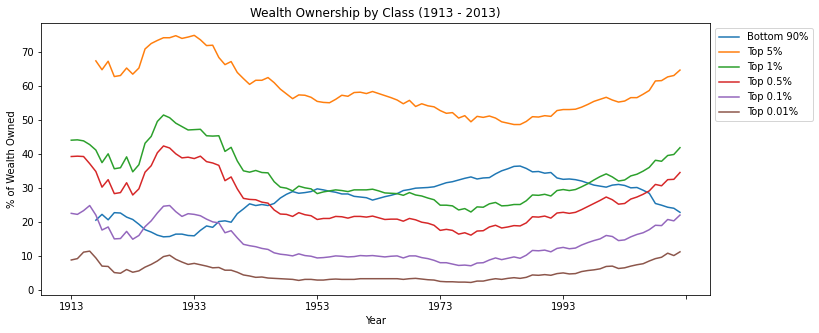

In [ ]:
wealth_data_new.plot(title="Wealth Ownership by Class (1913 - 2013)",
                     x="Year", y=wealth_data_new.columns[1:],
                     ylabel="% of Wealth Owned", figsize=(12, 5))
plt.legend(bbox_to_anchor=(1.0, 1.0))

#### Defense Spending

This dataset was a bit trickier to clean for analysis. For starters, the initial row of column names has been treated like a normal row of items in a dataset. I extracted the values of the first row and set the column labels ("axis = 1") to those values.

After that, I filtered to keep only rows that contain a year. This was done by checking if each row's value in the "Year" column can be converted to be numeric, then filtering for only those that can. This was done because there was added general information at the bottom of the CSV that isn't part of the data.

In [ ]:
cols = defense_data.iloc[0].values
defense_data2 = defense_data.set_axis(cols, axis = 1)[1:]
defense_data2 = defense_data2[pd.to_numeric(defense_data2.Year, errors = "coerce").notnull()]

I filtered for rows that are 1913 and later, then removed the last 8 rows (since they covered 2013 through 2020). 

The last column was unlabeled; when checking the dataset's source, it was indicated that the last column categorized the figures as either "actual" ("a") or "interpolated between actual" ("i") reported values. I chose to drop it, as it isn't likely to impact predictions and classification.

In [ ]:
defense_data2 = defense_data2.iloc[13:-8][defense_data2.columns[:-1]]

I converted all text values that are numeric into float values, initially avoiding all text starting with "<", as they were the only values in the table that couldn't be interpreted as numeric.

Those text values are converted into "NaN" float values in the second map filtering.

Finally, since the years were converted into floats in the first filtering, I converted them to strings by finding values in the correct year range. Once converted, I removed the ".0" that was added to the end of the year.

In [ ]:
defense_data3 = defense_data2.applymap(
    lambda x: x
    if x.startswith("<")
    else float(x)
    )

defense_data4 = defense_data3.applymap(
    lambda x: np.nan 
    if type(x) == str and x.startswith("<") 
    else x
    )

defense_data_new = defense_data4.applymap(
    lambda x: x
    if x not in range(1913, 2013)
    else str(x)[:-2]
    )

defense_data_new.head(10)

,Year,GDP-US $ billion 2012,Population-US million,Defense - Federal $ billion 2012
14,1913,NaN,96.167,7.35
15,1914,NaN,97.516,7.27
16,1915,NaN,98.885,7.04
17,1916,NaN,100.273,6.28
18,1917,NaN,101.680,19.12
19,1918,NaN,103.107,122.51
20,1919,NaN,104.554,171.62
21,1920,NaN,106.022,40.80
22,1921,NaN,107.626,30.32
23,1922,NaN,109.254,14.14


In [ ]:
defense_data_new.dtypes

Year                                 object
GDP-US $ billion 2012               float64
Population-US million               float64
Defense - Federal $ billion 2012    float64
dtype: object

I will present 2 line graphs. One will show all 3 columns, but since the US GDP is overwhelmingly larger than the US population and defense spending budget, so I decided to create a second graph that visualizes GDP and population size. It helps with side-by-side comparison.

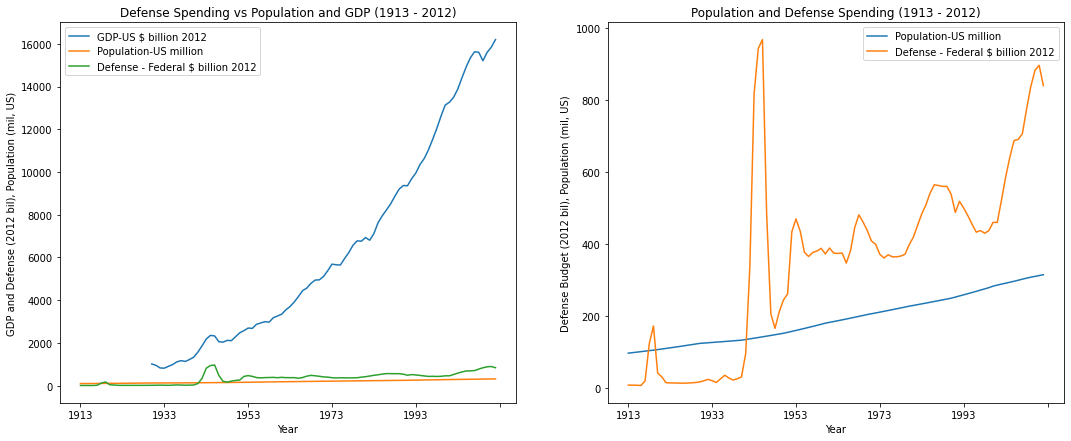

In [ ]:
figure, axes = plt.subplots(1, 2)
defense_data_new.plot(title="Defense Spending vs Population and GDP (1913 - 2012)", ax=axes[0],
                      x="Year", y=defense_data_new.columns[1:], figsize=(18, 7),
                      ylabel="GDP and Defense (2012 bil), Population (mil, US)")
defense_data_new.plot(title="Population and Defense Spending (1913 - 2012)", ax=axes[1],
                      x="Year", y=defense_data_new.columns[2:], figsize=(18, 7),
                      ylabel="Defense Budget (2012 bil), Population (mil, US)")

#### Minimum Wage

Cleaning the minimum wage and top marginal tax rate is fairly easy: I simply have to remove the dollar sign ($) then convert the strings into floats.

I first filter for strings that aren't four characters long, as monetary values consist of a dollar sign, a dollar amount, a decimal, and two decimal places, which is at least five characters. Those having more than four characters have their dollar sign removed and are converted to floats.

All values that are at least "1913" (years) are explicitly converted to string for good measure, and data for 2016 through 2020 are removed.

In [ ]:
minwage_data = minwage_data.reindex(index=minwage_data.index[::-1])
minwage_data1 = minwage_data.applymap(
    lambda x: x if len(str(x)) == 4 else float(x[1:])
)

minwage_data2 = minwage_data1.applymap(
    lambda x: x
    if x < 1913
    else str(x)
)
minwage_data_new = minwage_data2.iloc[:-4]
minwage_data_new.head(10)

,Year,Minimum Wage,In 2021 Dollars
78,1938,0.25,4.52
77,1939,0.30,5.58
76,1940,0.30,5.58
75,1941,0.30,5.54
74,1942,0.30,5.04
73,1943,0.30,4.62
72,1944,0.30,4.49
71,1945,0.40,5.85
70,1946,0.40,5.72
69,1947,0.40,4.85


In [ ]:
minwage_data_new.dtypes

Year                object
Minimum Wage       float64
In 2021 Dollars    float64
dtype: object

We compare the minimum wage each year with the same wage adjusted for 2021 dollars.

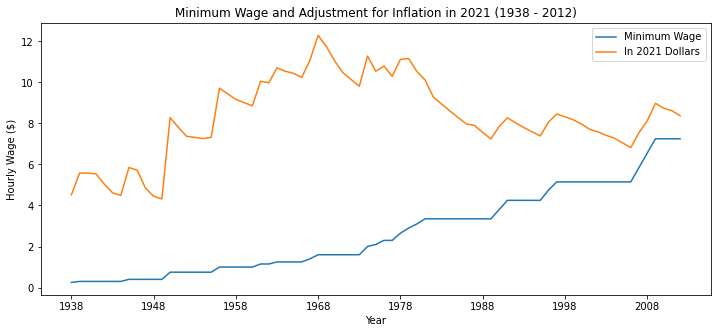

In [ ]:
minwage_data_new.plot(title="Minimum Wage and Adjustment for Inflation in 2021 (1938 - 2012)",
                      x="Year", y=minwage_data_new.columns[1:], 
                      ylabel="Hourly Wage ($)", figsize=(12, 5))

#### Top Marginal Tax Rate

Like the minimum wage dataset, this dataset was not a hassle to clean.

All percentages included at least one digit left of the decimal and two digits right of the decimal followed by a percent sign. This means that those values are at least five characters long. Values that aren't four characters in length (years) had the "%" removed and were converted to floats.

All values that are at least "1913" (years) are explicitly converted to string for good measure.

In [ ]:
toptax_data1 = toptax_data.applymap(
    lambda x: x if len(str(x)) == 4 else float(x[:1])
)

toptax_data_new = toptax_data1[:100].applymap(
    lambda x: x
    if x < 1913
    else str(x)
)
toptax_data_new.head(10)

,Year,Top Marginal Tax Rate
0,1913,7.0
1,1914,7.0
2,1915,7.0
3,1916,1.0
4,1917,6.0
5,1918,7.0
6,1919,7.0
7,1920,7.0
8,1921,7.0
9,1922,5.0


In [ ]:
toptax_data_new.dtypes

Year                      object
Top Marginal Tax Rate    float64
dtype: object

Here's a quick graph of the top tax rate. It can be noticed that it has a jaggedy parabolic shape.

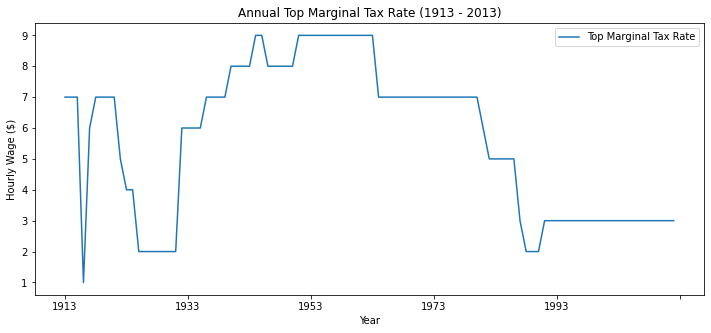

In [ ]:
toptax_data_new.plot(title="Annual Top Marginal Tax Rate (1913 - 2013)",
                     x="Year", y=toptax_data_new.columns[1], 
                     ylabel="Hourly Wage ($)", figsize=(12, 5))

#### U.S. Interventions (New Table)

The U.S. military intervention dataset was difficult to clean. 

Like the defense spending dataset, the program mistook the column labels are a row in the dataset. I extracted values of the first row and set the column labels to those respective values.

In [ ]:
cols = usinter_data.iloc[0].values
usinter_data2 = usinter_data.set_axis(cols, axis = 1)[1:]


After that, I chose to recreate the dataset, since the dataset didn't have a unique row for each year. This was the more difficult process.

The columns are as follows:
- The first column is the year in question
- The second column is the total number of interventions that year
- The third column is a concatenated text of all the comments regarding the interventions that occurred that year
- The rest of the columns are tallies of certain words that can be considered a categorization of the type of intervention.

These new columns were added, with the years in question applied to the "Year" column before being converted to strings. The column containing the concatenation of comments is initiated as a column of empty strings, and the rest of the columns were initiated with zeroes.

In [ ]:

columns = ["Year", "Total Interventions", "Naval", "Troops", 
           "Bombing", "Marines", "Nuclear", "Nuclear Threat", 
           "Missiles", "Jets", "All Comments"]

usinter_data_new = pd.DataFrame(columns = columns)
usinter_data_new.Year = range(1913, 2013)
usinter_data_new = usinter_data_new.applymap(lambda x: str(x) if x > 0 else x)

usinter_data_new["All Comments"] = ["- "] * 100

for col in usinter_data_new.columns[1:-1]:
  usinter_data_new[col] = [0] * 100

##### Populating the New Table

I went through each row in the original dataset, following these steps, which can be distinguished by the newline between them:

1. I extracted the dates of intervention into the "period" variable. Since one of these dates began with the letter "l" as opposed to the "1" that starts a year in the twentieth century, I did a check to make sure that this was addressed

2. I checked that the starting date of the intervention was 2012 at the latest. If not, I disregarded that event.

3. Here, I used a variable to determine what the ending period of the intervention is. I first start by initializing it as one year greater than the starting year.
  - If the ending year of a conflict is unknown ("YYYY-?"), I had the variable set to 2013 (range() in Python doesn't return the last incremental value, so it would stop at 2012). However, there are many older cases with ending dates.
  - If the end of the intervention is known, then the variable is set to one year higher than the ending year, for the same reason mentioned above. However, if the variable is greater than 2013 (meaning the conflict lasted beyond 2012), it is set to 2013, as the year 2012 is the limit of the data analysis.

4. I establish the "period" as the range of dates that the intervention occurred. An empty list to be populated with the various types of forces is initialized.

5. If a type of intervention "force" exists in the "Force" column of the original dataset that isn't in our force list, then we add it to the list.

6. For each year in the range of dates in the period:    
  - It gets the index of the row with the year by subtracting from 1913 (starting year)
  - It concatenates the comment regarding the intervention to the row's comment data and increments the number of total interventions for that year
  - It increments the proper columns that count each use of force

In [ ]:
for index, row in usinter_data2.iterrows():

  period = row["Dates of intervention"]
  if period[0] == 'l':
    period = '1' + period[1:]

  start = int(period[:4])
  if start > 2012:
    continue

  end = int(period[:4]) + 1
  if "-" in period:
    end = 2013 if period.endswith("?") else \
    int(period[:2] + period[-2:]) + 1
    end = 2013 if int(end) > 2013 else end

  period = range(int(start), int(end))
  forces = []

  for col in columns:
    if row.Forces.find(col) != -1:
      forces.append(col)

  for yr in period:
    ind = int(str(yr - 1913))
    usinter_data_new.at[ind, "All Comments"] += (row.Comments + " ")
    usinter_data_new.at[ind, "Total Interventions"] += 1

    for force in forces:
      usinter_data_new.at[ind, force] += 1

usinter_data_new.head(10)

,Year,Total Interventions,Naval,Troops,Bombing,Marines,Nuclear,Nuclear Threat,Missiles,Jets,All Comments
0,1913,1,1,0,0,0,0,0,0,0,- Americans evacuated during revolution.
1,1914,4,2,2,0,0,0,0,0,0,- Fight with rebels over Santo Domingo. Breaki...
2,1915,3,1,2,0,0,0,0,0,0,- Series of interventions against nationalists...
3,1916,3,1,2,0,0,0,0,0,0,- Series of interventions against nationalists...
4,1917,5,2,3,0,0,0,0,0,0,- Series of interventions against nationalists...
5,1918,7,3,4,0,0,0,0,0,0,- Series of interventions against nationalists...
6,1919,7,1,6,0,1,0,0,0,0,- 19-year occupation after revolts. 8-year Mar...
7,1920,7,1,6,0,0,0,0,0,0,- 19-year occupation after revolts. 8-year Mar...
8,1921,5,1,4,0,0,0,0,0,0,- 19-year occupation after revolts. 8-year Mar...
9,1922,6,2,4,0,0,0,0,0,0,- 19-year occupation after revolts. 8-year Mar...


In [ ]:
usinter_data_new.dtypes

Year                   object
Total Interventions     int64
Naval                   int64
Troops                  int64
Bombing                 int64
Marines                 int64
Nuclear                 int64
Nuclear Threat          int64
Missiles                int64
Jets                    int64
All Comments           object
dtype: object

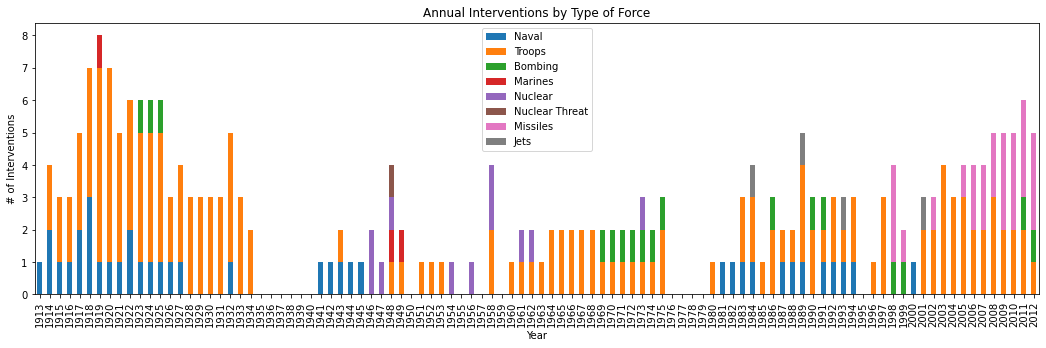

In [ ]:
usinter_data_new.plot.bar(title="Annual Interventions by Type of Force", 
                          x="Year", y=usinter_data_new.columns[2:10], stacked=True,
                          ylabel="# of Interventions", figsize=(18, 5), rot=90)

#### Merging the Data

 Finally, there will be a total merging process; though I'm not completely sure that it's necessary that all my data be merged into one dataset, I am going to do so in the case that it makes data analysis easier. I'll still have the cleaned separate datasets, but either choice is available.

The merge will be done on the year. Since all the datasets are from 1913 until 2012, data should not be lost in the process of this merge. I will be using the merge() function to make this happen. Keep in mind that minimum wage was established in 1938.



In [ ]:
merge = lambda x, y: x.merge(y[y.columns], how = "outer")

full_data = merge(wealth_data_new, defense_data_new)
for dataset in [minwage_data_new, toptax_data_new, usinter_data_new]:
  full_data = merge(full_data, dataset)

full_data.head(10)

,Year,Bottom 90%,Top 5%,Top 1%,Top 0.5%,Top 0.1%,Top 0.01%,GDP-US $ billion 2012,Population-US million,Defense - Federal $ billion 2012,Minimum Wage,In 2021 Dollars,Top Marginal Tax Rate,Total Interventions,Naval,Troops,Bombing,Marines,Nuclear,Nuclear Threat,Missiles,Jets,All Comments
0,1913,NaN,NaN,44.0,39.2,22.5,8.8,NaN,96.167,7.35,NaN,NaN,7.0,1,1,0,0,0,0,0,0,0,- Americans evacuated during revolution.
1,1914,NaN,NaN,44.1,39.3,22.2,9.2,NaN,97.516,7.27,NaN,NaN,7.0,4,2,2,0,0,0,0,0,0,- Fight with rebels over Santo Domingo. Breaki...
2,1915,NaN,NaN,43.8,39.2,23.3,11.1,NaN,98.885,7.04,NaN,NaN,7.0,3,1,2,0,0,0,0,0,0,- Series of interventions against nationalists...
3,1916,NaN,NaN,42.7,37.1,24.8,11.4,NaN,100.273,6.28,NaN,NaN,1.0,3,1,2,0,0,0,0,0,0,- Series of interventions against nationalists...
4,1917,20.5,67.3,41.1,34.8,22.0,9.4,NaN,101.680,19.12,NaN,NaN,6.0,5,2,3,0,0,0,0,0,0,- Series of interventions against nationalists...
5,1918,22.2,64.7,37.4,30.2,17.6,7.0,NaN,103.107,122.51,NaN,NaN,7.0,7,3,4,0,0,0,0,0,0,- Series of interventions against nationalists...
6,1919,20.6,67.2,40.0,32.4,18.5,6.9,NaN,104.554,171.62,NaN,NaN,7.0,7,1,6,0,1,0,0,0,0,- 19-year occupation after revolts. 8-year Mar...
7,1920,22.7,62.7,35.6,28.3,15.0,5.1,NaN,106.022,40.80,NaN,NaN,7.0,7,1,6,0,0,0,0,0,0,- 19-year occupation after revolts. 8-year Mar...
8,1921,22.6,63.0,35.9,28.6,15.1,4.9,NaN,107.626,30.32,NaN,NaN,7.0,5,1,4,0,0,0,0,0,0,- 19-year occupation after revolts. 8-year Mar...
9,1922,21.4,65.2,39.1,31.5,17.2,6.0,NaN,109.254,14.14,NaN,NaN,5.0,6,2,4,0,0,0,0,0,0,- 19-year occupation after revolts. 8-year Mar...


### Data Wrangling



#### General Statistical Overview

For each of the attributes, I got an overview of how the values looked like. A few of the attributes didn't have the full 100 needed, including the minimum wage, which only started being imposed in 1938.

In [ ]:
full_data = full_data.applymap(lambda x: x if x not in ["nan", "NaN"] else np.nan)
general_stats = full_data[full_data.columns[1:-1]].describe(include='all').T
general_stats

,count,mean,std,min,25%,50%,75%,max
Bottom 90%,96.0,27.120833,5.679676,15.600,22.77500,28.4000,31.100,36.400
Top 5%,96.0,58.908333,7.255396,48.600,53.77500,57.0000,63.000,74.800
Top 1%,100.0,33.588000,7.395635,22.900,28.30000,30.8500,38.350,51.400
Top 0.5%,100.0,26.216000,7.164696,16.100,21.00000,23.5500,31.125,42.300
Top 0.1%,100.0,13.976000,5.042909,7.100,9.90000,12.2500,17.625,24.800
Top 0.01%,100.0,5.260000,2.488966,2.200,3.20000,4.4500,7.000,11.400
GDP-US $ billion 2012,83.0,6426.686747,4729.205265,817.300,2412.70000,5114.3000,9525.200,16197.000
Population-US million,100.0,190.596640,65.436948,96.167,130.09325,185.0425,242.409,313.878
Defense - Federal $ billion 2012,100.0,352.410200,253.679463,6.280,39.30750,378.0450,482.165,966.900
Minimum Wage,75.0,2.694000,2.068489,0.250,1.00000,2.1000,4.250,7.250


#### Boxplots of Numerical Data

The wealth distribution box-and-whisker plot shows a typically wider box and whisker as it gets further and further from the "Top 0.01%". This could indicate that the higher the class of wealth, the more likely the class is to have stability and consistency in the wealth ownership. However, the top 1% and 5% have larger box-and-whiskers than the bottom 90%, though their boxes and averages are much higher. In fact, the top 1% was the only one with an outlier.

The spending on defense turned out more sporadic as well, with a box that is multiple times larger than the boxplot of the population and a top whisker that was nearly twice as larger as the entire population boxplot as well.

The minimum wage boxes were similar, and there isn't much to be surprised about with the fact that the actual value of minimum wage at the time is much lower than the inflation adjustment to 2021 dollars. It is interesting to note that the highest point of the regular minimum wage whisker is the current minimum wage, which still only reaches the very low end of the actual box-and-whisker of the minimum wage adjusted to the current dollar value.



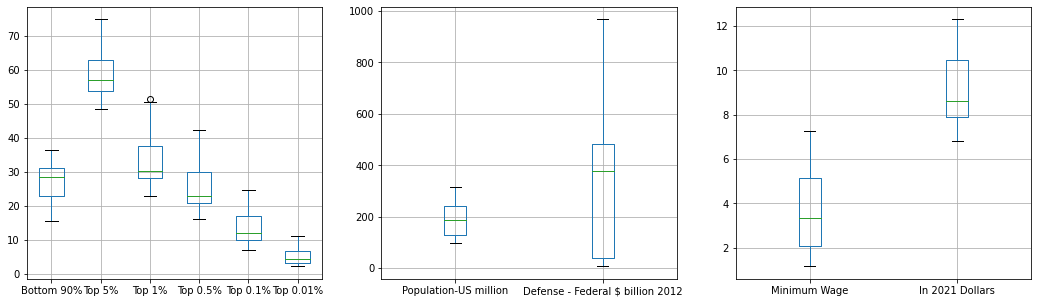

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
wealth_data_new.iloc[4:].boxplot(ax=axes[0])
defense_data_new[["Population-US million", "Defense - Federal $ billion 2012"]].boxplot(ax=axes[1])
minwage_data_new[24:].boxplot(ax=axes[2])

### Relationships - Correlation Matrices

#### Between Select Attributes and Each Class

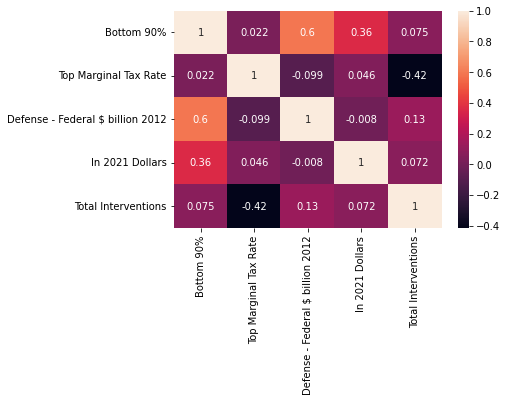

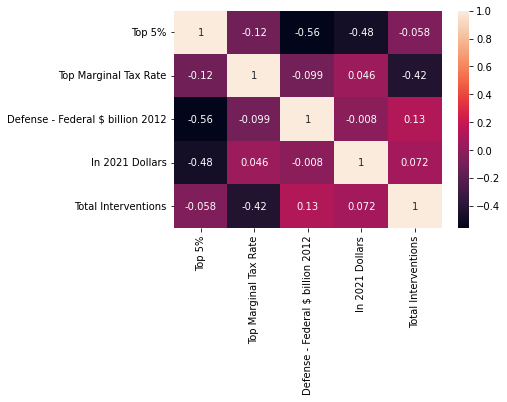

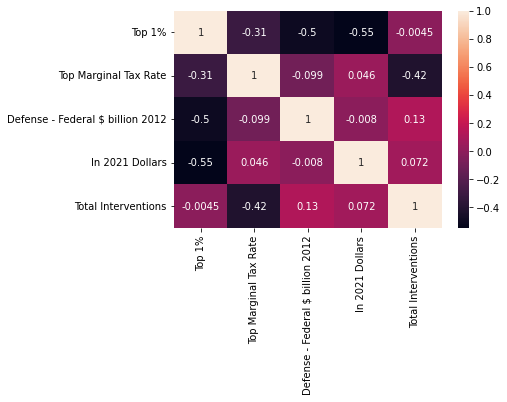

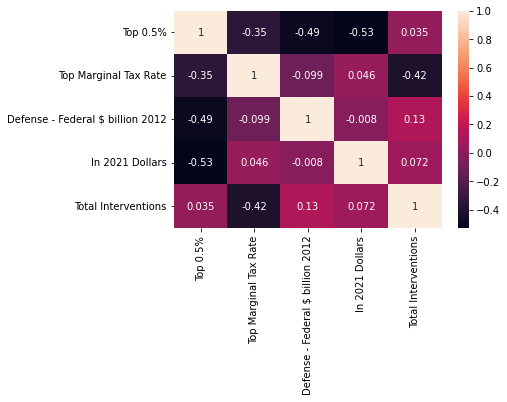

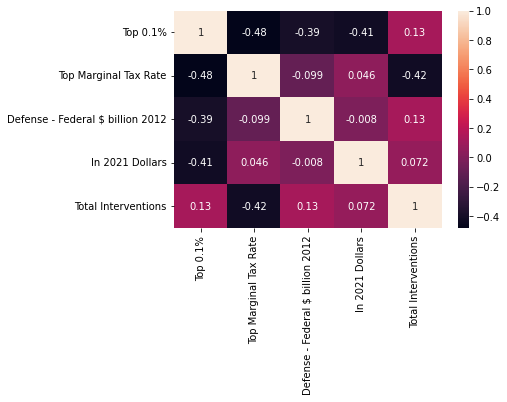

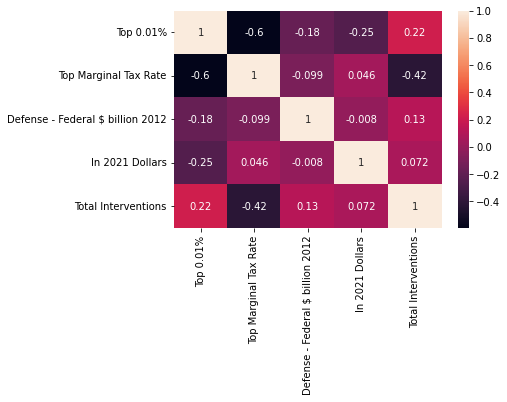

In [ ]:
classCols = full_data.columns[1:7]
corrCols = ["Top Marginal Tax Rate", "Defense - Federal $ billion 2012", "In 2021 Dollars", "Total Interventions"]

for cls in classCols:
  corrMatrix = full_data[[cls] + corrCols].corr()
  sn.heatmap(corrMatrix, annot=True)
  plt.show()

##### Insights from Correlation Matrices

- I'm surprised that the wealth concentration above the Top 10% has a negative correlation with the total defense spending, yet a positive correlation with the number of total annual interventions.
- To follow with the previous point, there is a positive correlation between defense spending and bottom 90% wealth. I'm not sure why that may be - there may be more jobs available and more opportunities for those in marginalized groups to enlist in the military. Also, this may (more likely) be because we spent a lot of money on defense during the Cold War period, yet the domestic economic policies forced the rich to pay more taxes.
- To no surprise, the top marginal tax rate is negatively correlated with wealth as the class gets higher. There is a negligible, slightly positive (0.022) correlation between top tax rate and bottom 90% wealth.
- The minimum wage is negatively correlated to the wealth of the classes that are top 10% or higher, with the highest negative correlation happening against the top 1%. It is positively correlated to the wealth of the bottom 90%.
- There is a negative correlation between the number of total annual interventions and the wealth of the bottom 90%, though it's not very strong of a correlation, at -.27.

#### Class Wealth Ownership Correlation

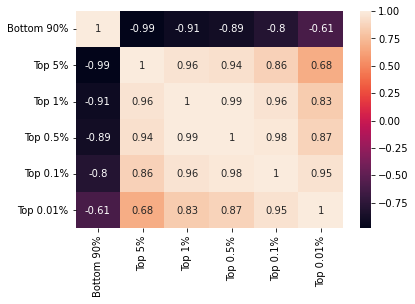

In [ ]:
corrMatrix2 = full_data[classCols].corr()
sn.heatmap(corrMatrix2, annot=True)
plt.show()

This correlation matrix heatmap shows the correlation between different classes of wealth. The top 0.01%'s wealth concentration correlates heavily with the top 0.1%,  which might not be too surprising. In fact, there's a correlation of 0.68 with the top 5% and 0.61 with the top 10%. Though high, they are not as high as when in proximity with a closer wealth class.

On the flip side, the bottom 90% have an unbelievable -0.99 correlation with the top 5%, which means they are nearly the polar opposite. Oddly, the negative 
correlation gets lower the higher the class. 

#### Single Correlation Map Using All Attributes (Except Year and Comments)

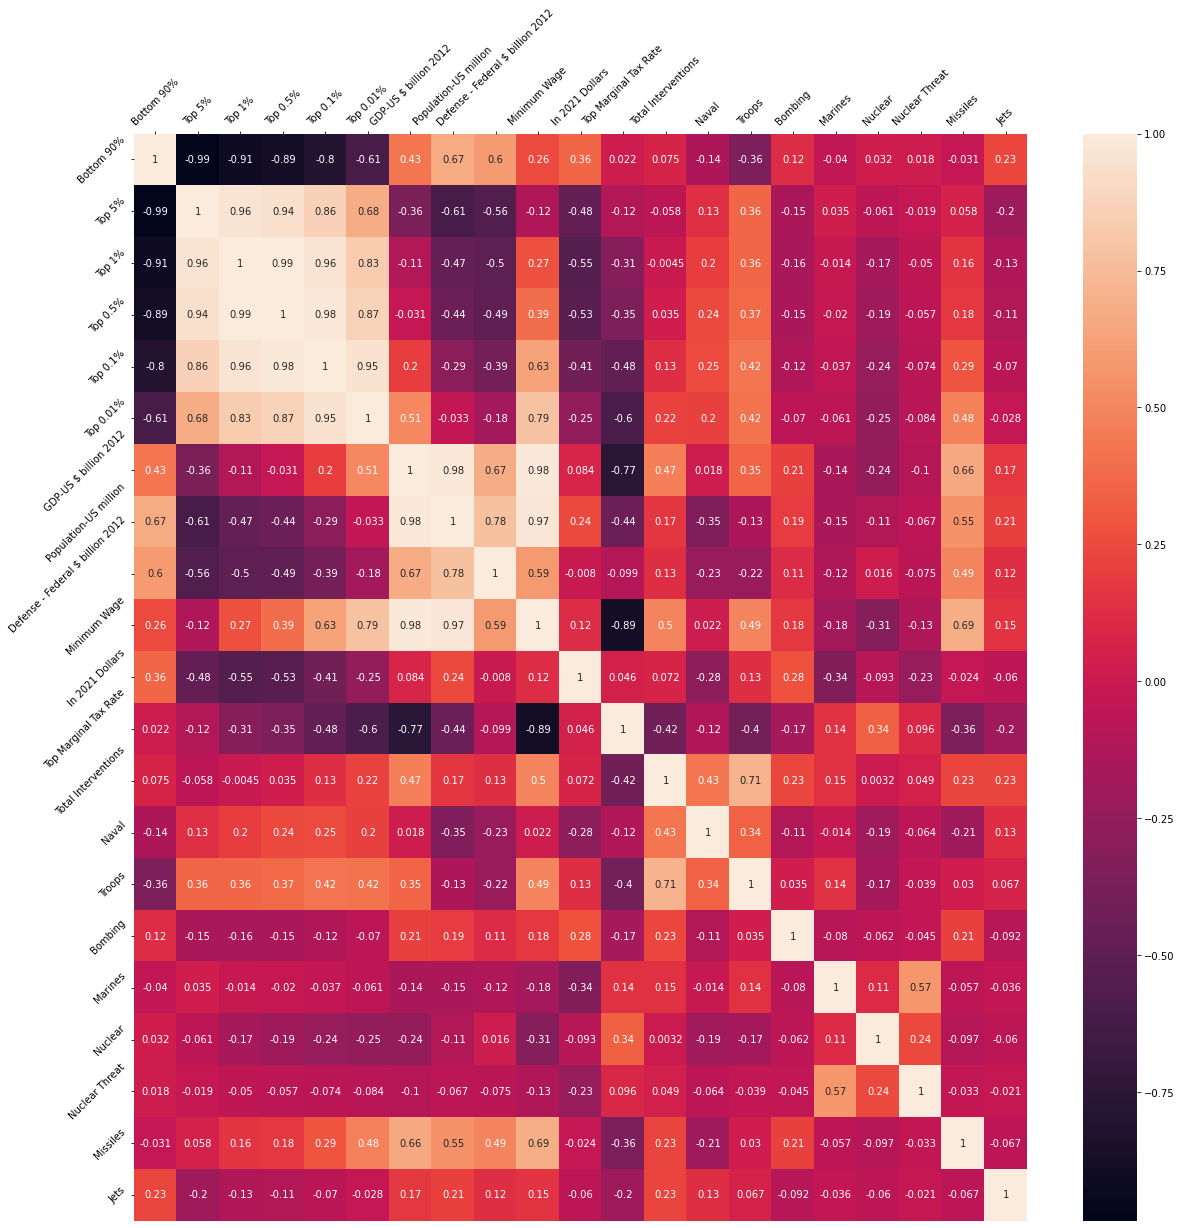

In [ ]:
corrMatrix3 = full_data[full_data.columns[1:-1]].corr()
fig, ax = plt.subplots(figsize=(20, 20))
sn.heatmap(corrMatrix3, annot=True, ax=ax)
plt.tick_params(labelbottom=False, bottom=False, top=True, labeltop=True, labelrotation=45)
plt.show()

## Data Analysis

### U.S. Intervention Text Analysis

#### Text Cleaning

We will start by tokenizing, normalizing (to lowercase), filtering for punctuation, removing stopwords, and stemming the text.

In [ ]:
import nltk
nltk.download()

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> PorterStemmer
Command 'PorterStemmer' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stem.porter
Command 'stem.porter' unrecognized

-------------------------------------------------------------

In [ ]:
full_data["All Comments"] = full_data["All Comments"].apply(word_tokenize)

stop_words = stopwords.words("english")
porter = PorterStemmer()

def tokens_lower(series):
  return [word.lower() for word in series]
full_data["All Comments"] = full_data["All Comments"].apply(tokens_lower)

def filter_punc(series):
  return [word for word in series if word.isalpha()]
full_data["All Comments"] = full_data["All Comments"].apply(filter_punc)

def no_stopwords(series):
  return [word for word in series if not word in stop_words]
full_data["All Comments"] = full_data["All Comments"].apply(no_stopwords)

def stemmer(series):
  return [porter.stem(word) for word in series]
full_data["All Comments"] = full_data["All Comments"].apply(stemmer)

full_data["All Comments"].head(10)

0                           [american, evacu, revolut]
1    [fight, rebel, santo, domingo, break, miner, s...
2    [seri, interv, nationalist, occup, revolt, fed...
3    [seri, interv, nationalist, occup, revolt, mar...
4    [seri, interv, nationalist, occup, revolt, mar...
5    [seri, interv, nationalist, occup, revolt, mar...
6    [occup, revolt, marin, occup, militari, occup,...
7    [occup, revolt, marin, occup, militari, occup,...
8    [occup, revolt, marin, occup, militari, occup,...
9    [occup, revolt, marin, occup, militari, occup,...
Name: All Comments, dtype: object

#### Word Association with Wealth Concentration

I will be creating a dictionary of words that are found in the comments. Each word will be a key. The value behind each key will be a dictionary of the "total" percents added up from the rows in which the word was found. In that dictionary will also be a counter for the number of times the word was found. <b>This will be used to find the average wealth ownership per class in which that word is used.</b>

The code explained here moves to the next numerical "step" in the list after the code skips a line (list item 1 discusses "classes = ...", list item 2 discusses "words = {}" and "for index ...", list item 3 discusses "for word in ...", etc.).

1. Create an array of column names of classes that we inspect the wealth ownership average for each word.</br></br>
2. Initiate an empty dictionary for the words. Iterate each row in the dataset.</br></br>
3. Iterate each word for the comments on interventions in each row.</br></br>
4. If the current word is not in the dictionary, add it with an empty dictionary.</br></br>
5. For each class within the class array, if the class isn't in the dictionary of the word or the word has the class with a "NaN" value, then initiate a key in the word's dictionary and set it to zero.</br></br>After that, add the class ownership percent for the class in question from the row to the current value.</br></br>
6. We need the count of number of occurrences of the word. This will be used in the end to divide the number we calculated in step 5 in order to get an average wealth ownership of that class. Like step 5, we check if the count value is in the word's dictionary. If not, we initiate it to 0, then increment it by 1.</br></br>
7. We step out from both loops and create the dictionary to be used for making a Dataframe. We first create a dictionary key for "word" and give it a value of a list of all the words encountered. After that, we iterate through the class column names, get the accumulated wealth ownership for that class divided by the count for each word, and set that into a list that is under the key for the respective class.</br></br>
8. Finally, we create and display the Dataframe.

In [ ]:
classes = ["Bottom 90%", "Top 5%", "Top 1%", 
           "Top 0.5%", "Top 0.1%", "Top 0.01%"]

words = {}
for index, row in full_data.iterrows():
  
  for word in row["All Comments"]:
    
    if word not in words:
      words[word] = {}
    
    for cls in classes:
      if cls not in words[word] or pd.isna(words[word][cls]):
        words[word][cls] = 0
      words[word][cls] += row[cls]
    
    if "Count" not in words[word]:
      words[word]["Count"] = 0
    words[word]["Count"] += 1

word_wealth = {'word': [word for word in words]}
for cls in classes:
  word_wealth[cls] = [words[word][cls] / words[word]["Count"] for word in words]

word_wealth_df = pd.DataFrame(word_wealth)
word_wealth_df.head(10)

,word,Bottom 90%,Top 5%,Top 1%,Top 0.5%,Top 0.1%,Top 0.01%
0,american,21.550000,42.125000,32.700000,25.800000,13.050000,4.550000
1,evacu,26.114286,47.142857,31.842857,25.042857,13.185714,4.885714
2,revolut,32.300000,47.306250,27.500000,21.100000,11.012500,4.106250
3,fight,22.770000,54.720000,35.210000,28.010000,14.950000,5.450000
4,rebel,29.015909,52.634091,31.597727,24.815909,13.968182,6.095455
5,santo,NaN,NaN,44.100000,39.300000,22.200000,9.200000
6,domingo,NaN,NaN,44.100000,39.300000,22.200000,9.200000
7,break,NaN,NaN,44.100000,39.300000,22.200000,9.200000
8,miner,NaN,NaN,44.100000,39.300000,22.200000,9.200000
9,strike,25.804167,57.312500,36.875000,29.912500,17.995833,8.462500


##### Using WordCloud

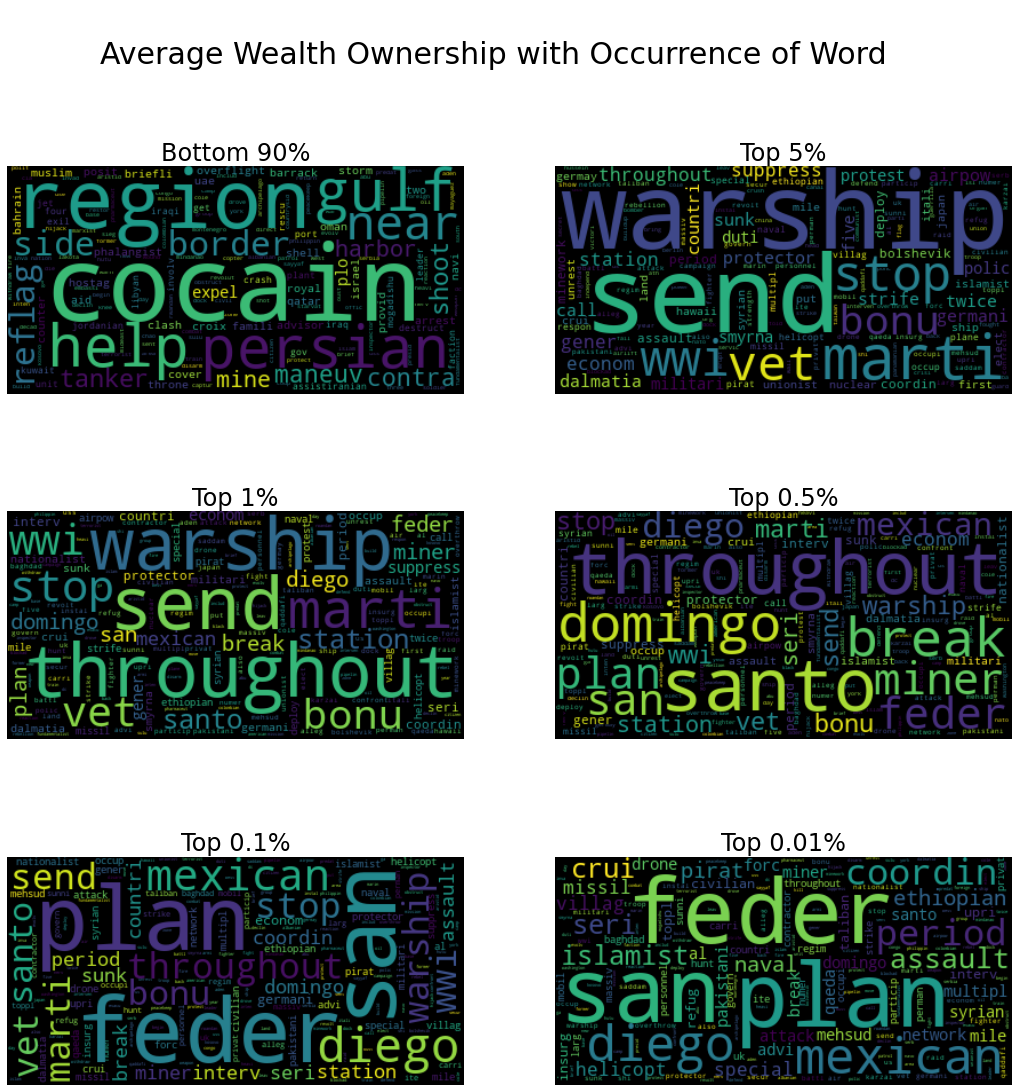

In [ ]:
from wordcloud import WordCloud

count_dict = {}
for cls in classes:
  count_dict[cls] = {}

for index, row in word_wealth_df.iterrows():
  for cls in classes:
    count_dict[cls][row["word"]] = row[cls] if not pd.isna(row[cls]) else 0

fig = plt.figure(figsize=(18, 18))
fig.suptitle("\nAverage Wealth Ownership with Occurrence of Word", size=30)

for i in range(len(classes)):
  ax = fig.add_subplot(3, 2, i + 1)
  
  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=count_dict[classes[i]])
  
  ax.imshow(wordcloud, interpolation="bilinear")
  ax.set_title(classes[i], size=24)
  ax.axis("off")


#### Intervention Query - "Create a Conflict"

This feature will allow a user to insert a query of a "comment" regarding an imaginary intervention (attempt to use keywords from original comments) along with the type of "force". There will result an average wealth ownership for each class based on the intervention.

In [ ]:
usinter_data_new
Force = "Troops" #@param ["Naval", "Troops", "Bombing", "Marines", "Nuclear", "Nuclear Threat", "Missiles", "Jets"]
Description = "American troops invade Arabic Gulf to seize cocaine" #@param {type: "string"}

##### Average Annual Wealth Ownership by Class by Count of Force Type

In [ ]:
means = full_data.groupby(Force).mean()
means = means[classes]
print(means)

        Bottom 90%     Top 5%     Top 1%   Top 0.5%   Top 0.1%  Top 0.01%
Troops                                                                   
0        27.300000  58.535714  32.831034  25.231034  12.737931   4.341379
1        30.033333  54.979167  28.795833  21.445833  10.595833   3.745833
2        28.918182  56.945455  33.296000  26.408000  14.672000   6.092000
3        22.358333  65.991667  41.775000  33.950000  19.758333   8.041667
4        21.325000  65.262500  38.287500  30.862500  17.062500   6.175000
6        21.650000  64.950000  37.800000  30.350000  16.750000   6.000000


We will find the average for each class by multiplying the wealth percents by the number of interventions, then dividing by the intervention total.

In [ ]:
def force_weighted_avg(series):
  count = 0
  total = 0

  for i in series.index:
    count += i
    total += series[i] * i

  return total / count

means.apply(force_weighted_avg)


Bottom 90%    23.134044
Top 5%        63.599692
Top 1%        37.541427
Top 0.5%      30.103865
Top 0.1%      16.747802
Top 0.01%      6.297177
dtype: float64

##### Average Annual Wealth Ownership by Class with Comment Analysis

First, we clean the words from the intervention description.

In [ ]:
clean_desc = word_tokenize(Description)
clean_desc = [word.lower() for word in clean_desc]
clean_desc = [word for word in clean_desc if word.isalpha()]
clean_desc = [word for word in clean_desc if not word in stop_words]
clean_desc = [porter.stem(word) for word in clean_desc]
print(clean_desc)

['american', 'troop', 'invad', 'arab', 'gulf', 'seiz', 'cocain']


Then we search if those words occur in the comments from our data.

If they do, we get the count of occurrences and sum of the wealth ownership percentages for each class. We will add that to a total count of the words and wealth ownership percentages in regards to the query.

Finally, we use that to get a query average wealth ownership for each class.

In [ ]:
desc_wealth = {cls: 0 for cls in classes}
count = 0

for word in clean_desc:
  if word in words:
    for cls in classes:
      desc_wealth[cls] += words[word][cls]
    count += words[word]["Count"]

print("Predicted Wealth Ownership for Each Class During Intervention: \n")
avg_desc_wealth = {}
for cls in classes:
  avg_desc_wealth[cls] = desc_wealth[cls] / count
  print("\t" + cls + ": " + str(round(desc_wealth[cls] / count, 2)) + "%")

Predicted Wealth Ownership for Each Class During Intervention: 

	Bottom 90%: 28.66%
	Top 5%: 55.11%
	Top 1%: 32.93%
	Top 0.5%: 26.02%
	Top 0.1%: 14.85%
	Top 0.01%: 6.53%


<BarContainer object of 6 artists>

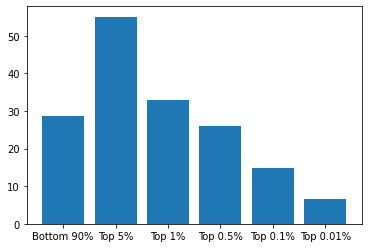

In [ ]:
plt.bar(avg_desc_wealth.keys(), avg_desc_wealth.values())

### Pattern Mining Using Above or Below Average

I'd like to see if there are different association rules within the dataset.(e.g., high Top 1% wealth ownership is associated with low minimum wage, high defense spending is associated with high Bottom 90% wealth, low GDP is associated with low top tax rate, etc.)

We must create a new list of lists where the values are represented as above or below average of each data column rather than floats. I would create these into a format of strings (as column + quartile) so the implementation works properly. I chose to remove the minimum wage because it steadily increases over time, which doesn't really help in our analysis.

In [ ]:
halves = []

for index, row in full_data.iterrows():
  item = []

  for col in full_data.columns[1:-9]:
    half = 1

    col_stats = general_stats.loc[col]
    if row[col] > col_stats["50%"]:
      half = 2
    item.append(col + " - " + str(half))
  halves.append(item)

print(halves)

[['Bottom 90% - 1', 'Top 5% - 1', 'Top 1% - 2', 'Top 0.5% - 2', 'Top 0.1% - 2', 'Top 0.01% - 2', 'GDP-US $ billion 2012 - 1', 'Population-US million - 1', 'Defense - Federal $ billion 2012 - 1', 'Minimum Wage - 1', 'In 2021 Dollars - 1', 'Top Marginal Tax Rate - 1', 'Total Interventions - 1'], ['Bottom 90% - 1', 'Top 5% - 1', 'Top 1% - 2', 'Top 0.5% - 2', 'Top 0.1% - 2', 'Top 0.01% - 2', 'GDP-US $ billion 2012 - 1', 'Population-US million - 1', 'Defense - Federal $ billion 2012 - 1', 'Minimum Wage - 1', 'In 2021 Dollars - 1', 'Top Marginal Tax Rate - 1', 'Total Interventions - 2'], ['Bottom 90% - 1', 'Top 5% - 1', 'Top 1% - 2', 'Top 0.5% - 2', 'Top 0.1% - 2', 'Top 0.01% - 2', 'GDP-US $ billion 2012 - 1', 'Population-US million - 1', 'Defense - Federal $ billion 2012 - 1', 'Minimum Wage - 1', 'In 2021 Dollars - 1', 'Top Marginal Tax Rate - 1', 'Total Interventions - 1'], ['Bottom 90% - 1', 'Top 5% - 1', 'Top 1% - 2', 'Top 0.5% - 2', 'Top 0.1% - 2', 'Top 0.01% - 2', 'GDP-US $ billion 201

Here, we will use the Apriori Algorithm to figure out which associations exist.

As a user, feel free to change the minimum support ("min_support") and minimum confidence ("min_threshold") and discover more insights!

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

te = TransactionEncoder()
te_ary = te.fit(halves).transform(halves)
occurs_df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(occurs_df, min_support=0.45, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.53,(Bottom 90% - 1)
1,0.47,(Bottom 90% - 2)
2,0.50,(Defense - Federal $ billion 2012 - 1)
3,0.50,(Defense - Federal $ billion 2012 - 2)
4,0.59,(GDP-US $ billion 2012 - 1)
5,0.63,(In 2021 Dollars - 1)
6,0.63,(Minimum Wage - 1)
7,0.50,(Population-US million - 1)
8,0.50,(Population-US million - 2)
9,0.50,(Top 0.01% - 1)


In [ ]:
assoc = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

for index, row in assoc.iterrows():
  for item in (list(row.antecedents) + list(row.consequents)):
    if item[:-4] in full_data.columns[7:-9]:
      break
  else:
    assoc.drop(index, inplace=True)

assoc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Defense - Federal $ billion 2012 - 1),(Minimum Wage - 1),0.50,0.63,0.46,0.920000,1.460317,0.1450,4.625000
3,(Minimum Wage - 1),(GDP-US $ billion 2012 - 1),0.63,0.59,0.59,0.936508,1.587302,0.2183,6.457500
4,(GDP-US $ billion 2012 - 1),(Minimum Wage - 1),0.59,0.63,0.59,1.000000,1.587302,0.2183,inf
5,(Population-US million - 1),(GDP-US $ billion 2012 - 1),0.50,0.59,0.50,1.000000,1.694915,0.2050,inf
6,(Population-US million - 1),(Minimum Wage - 1),0.50,0.63,0.50,1.000000,1.587302,0.1850,inf
7,(Population-US million - 2),(Top Marginal Tax Rate - 1),0.50,0.76,0.49,0.980000,1.289474,0.1100,12.000000
16,(Top 0.01% - 2),(Top Marginal Tax Rate - 1),0.50,0.76,0.49,0.980000,1.289474,0.1100,12.000000
25,(Top 0.1% - 2),(Top Marginal Tax Rate - 1),0.50,0.76,0.46,0.920000,1.210526,0.0800,3.000000
30,"(Minimum Wage - 1, Bottom 90% - 1)",(GDP-US $ billion 2012 - 1),0.47,0.59,0.47,1.000000,1.694915,0.1927,inf
31,"(GDP-US $ billion 2012 - 1, Bottom 90% - 1)",(Minimum Wage - 1),0.47,0.63,0.47,1.000000,1.587302,0.1739,inf


### Prediction - Model Training

We would like to be able to predict the wealth ownership of each of the six classes of wealth with various inputs of data. We will later be evaluating how well the model has done.

To start, we will have y be a list of 6 columns, each item being one of the columns of the class levels and their values.

In [ ]:
y_list = [full_data[4:][full_data.columns[i]] for i in range(1, 7, 1)]
for y in y_list:
  print(y.head())

4    20.5
5    22.2
6    20.6
7    22.7
8    22.6
Name: Bottom 90%, dtype: float64
4    67.3
5    64.7
6    67.2
7    62.7
8    63.0
Name: Top 5%, dtype: float64
4    41.1
5    37.4
6    40.0
7    35.6
8    35.9
Name: Top 1%, dtype: float64
4    34.8
5    30.2
6    32.4
7    28.3
8    28.6
Name: Top 0.5%, dtype: float64
4    22.0
5    17.6
6    18.5
7    15.0
8    15.1
Name: Top 0.1%, dtype: float64
4    9.4
5    7.0
6    6.9
7    5.1
8    4.9
Name: Top 0.01%, dtype: float64


We will then get a list of features (X) for use in training the model. For the sake of not overcomplicating the model, we will be avoiding the use of the columns regarding the type of force, since user input may allow for more kinds of total forces than number of interventions, which is flawed.

NaN values for minimum wage and its inflation adjustment will be replaced with 0, and GDP will be replaced with the minimum GDP value, since they are empty in the beginning of the dataset.

In [ ]:
X = full_data[full_data.columns[7:-10]][4:]
X["Minimum Wage"].replace({np.nan: 0}, inplace=True)
X["In 2021 Dollars"].replace({np.nan: 0}, inplace=True)
X.fillna(X.min(), inplace=True)
X.head()

,GDP-US $ billion 2012,Population-US million,Defense - Federal $ billion 2012,Minimum Wage,In 2021 Dollars,Top Marginal Tax Rate
4,817.3,101.680,19.12,0.0,0.0,6.0
5,817.3,103.107,122.51,0.0,0.0,7.0
6,817.3,104.554,171.62,0.0,0.0,7.0
7,817.3,106.022,40.80,0.0,0.0,7.0
8,817.3,107.626,30.32,0.0,0.0,7.0


We then try SVC, Decision Tree, Random Forest Regressor, and KNN to train the model. We use 80% of the data to train the model and the other 20% to test if the model did well. We then will compare scores and select the best model for the final user application.

We will have 10 different random states for all model generators other than KNN, which will be changed to have 1 through 10 nearest neighbors for interpretation. I chose to keep it at 10 iterations to prevent it from taking too much time. Because of this, for each wealth class, there will be 40 different models to select from for the lowest mean absolute error.

Of course, this will be done six times (240 in total) in order to produce a model to predict the wealth ownership for each class.

In [ ]:
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
class_models = {}
errors = {}
max_score = 0

for y in y_list:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

  lab_enc = LabelEncoder()
  y_train_enc = lab_enc.fit_transform(y_train)

  min_error = None
  class_models[y.name] = None
  errors[y.name] = {"SVC": None, "Decision Tree": [], "KNN": [], "Random Forest": []}

  svc = svm.SVC(kernel="linear")
  svc.fit(X_train, y_train_enc)
  svc_pred = svc.predict(X_test)
  errors[y.name]["SVC"] = [mean_absolute_error(y_test, svc_pred)] * 10
  class_models[y.name] = svc
  min_error = errors[y.name]["SVC"][0]

  for i in range(10):

    decTree = DecisionTreeRegressor(random_state=i)
    decTree.fit(X_train, y_train_enc)
    decTree_pred = decTree.predict(X_test)
    errors[y.name]["Decision Tree"].append(mean_absolute_error(y_test, decTree_pred))
    class_models[y.name] = decTree if errors[y.name]["Decision Tree"][-1] < min_error else class_models[y.name]
    min_error = errors[y.name]["Decision Tree"][-1] if errors[y.name]["Decision Tree"][-1] < min_error else min_error

    knn = KNeighborsClassifier(i + 1)
    knn.fit(X_train, y_train_enc)
    knn_pred = knn.predict(X_test)
    errors[y.name]["KNN"].append(mean_absolute_error(y_test, knn_pred))
    class_models[y.name] = knn if errors[y.name]["KNN"][-1] < min_error else class_models[y.name]
    min_error = errors[y.name]["KNN"][-1] if errors[y.name]["KNN"][-1] < min_error else min_error

    randForest = RandomForestRegressor(random_state=i)
    randForest.fit(X_train, y_train_enc)
    randForest_pred = randForest.predict(X_test)
    errors[y.name]["Random Forest"].append(mean_absolute_error(y_test, randForest_pred))
    class_models[y.name] = randForest if errors[y.name]["Random Forest"][-1] < min_error else class_models[y.name]
    min_error = errors[y.name]["Random Forest"][-1] if errors[y.name]["Random Forest"][-1] < min_error else min_error
    
for i in class_models.keys():
  print(i + ": " + str(class_models[i]))

Bottom 90%: DecisionTreeRegressor(random_state=0)
Top 5%: KNeighborsClassifier(n_neighbors=10)
Top 1%: KNeighborsClassifier(n_neighbors=9)
Top 0.5%: RandomForestRegressor(random_state=4)
Top 0.1%: RandomForestRegressor(random_state=4)
Top 0.01%: RandomForestRegressor(random_state=6)


#### Mean Absolute Error at Various Random States for All Models

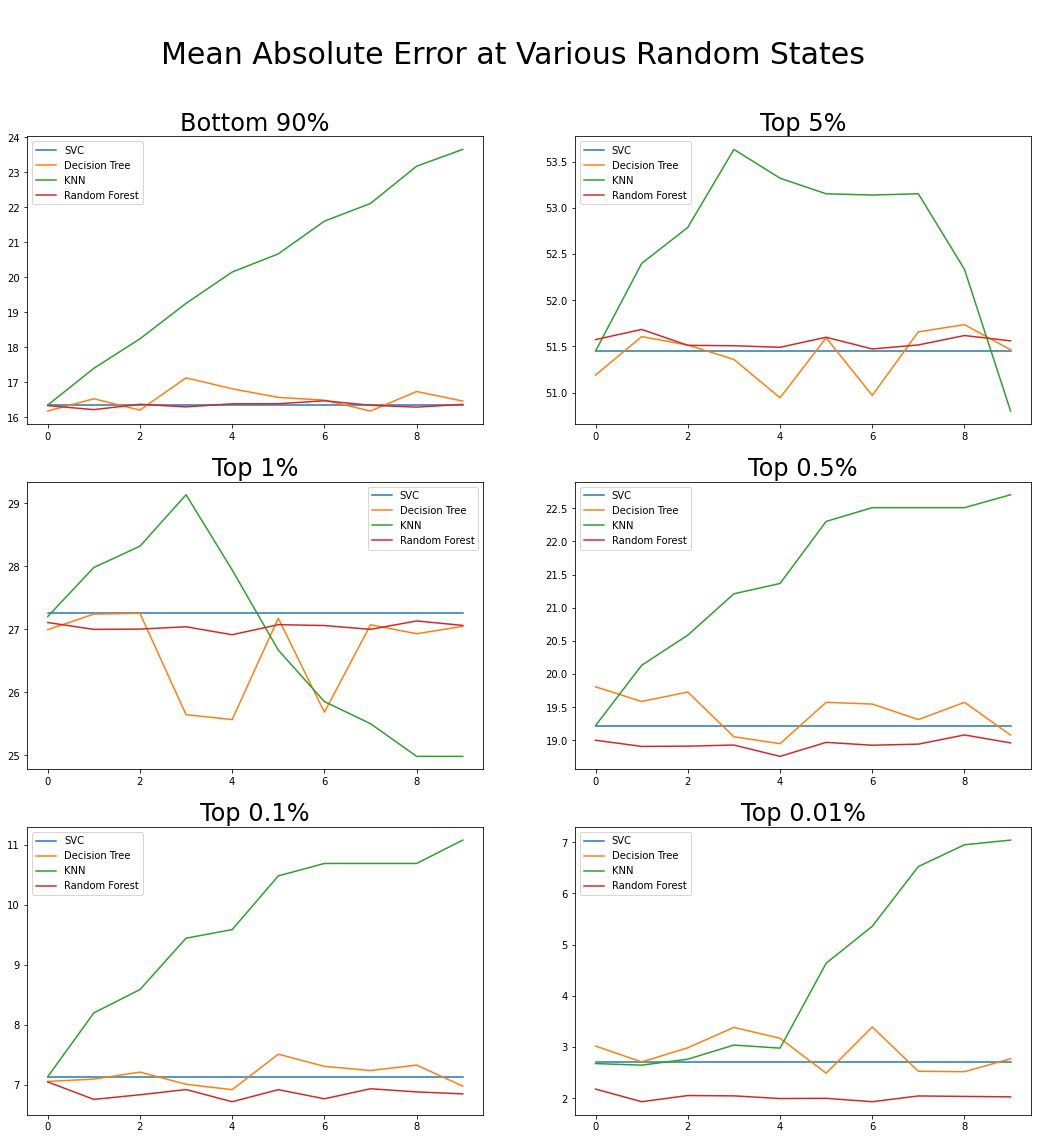

In [ ]:
fig = plt.figure(figsize=(18, 18))
fig.suptitle("\nMean Absolute Error at Various Random States", size=30)

for i in range(len(classes)):
  ax = fig.add_subplot(3, 2, i + 1)
  
  for key, error_list in errors[classes[i]].items():
    plt.plot(error_list, label=key)
  
  plt.legend()
  ax.set_title(classes[i], size=24)


#### Add Your Own Figures!

In [ ]:
gdp = float(input("GDP (in US $ billion 2012): "))
population = float(input("Population (in millions): "))
defense_budget = float(input("Defense budget (in US $ billion 2012): "))
minimum_wage = float(input("Minimum wage (in current amount): "))
inflation_wage = float(input("Minimum wage (in 2021 dollars): "))
top_tax_rate = float(input("Top marginal tax rate: "))

new_pred = pd.DataFrame({"GDP-US $ billion 2012": [gdp], 
                         "Population-US million": [population], 
                         "Defense - Federal $ billion 2012": [defense_budget], 
                         "Minimum Wage": [minimum_wage], 
                         "In 2021 Dollars": [inflation_wage], 
                         "Top Marginal Tax Rate": [top_tax_rate]})

print("\nOUR PREDICTIONS FOR EACH WEALTH CLASS: \n")
for cls in classes:
  print(cls + ": " + str(class_models[cls].predict(new_pred))[1:-1] + "%")

GDP (in US $ billion 2012): 1800
Population (in millions): 100
Defense budget (in US $ billion 2012): 150
Minimum wage (in current amount): 5
Minimum wage (in 2021 dollars): 10
Top marginal tax rate: 35

OUR PREDICTIONS FOR EACH WEALTH CLASS: 

Bottom 90%: 8.%
Top 5%: 7%
Top 1%: 13%
Top 0.5%: 6.67%
Top 0.1%: 6.75%
Top 0.01%: 6.23%


## Conclusion

- I started by mapping out a solid implementation of this project, and feel like I accomplished all of my objectives.
- I first cleaned all the data from each of the five datasets, removing percent and dollar symbols, converting numerical strings to floats, and visualizing the results for validity.
- Some data wrangling provided us with insight on what we were look at statistically, with a boxplot to get further understanding.
- Heatmaps gave us a quick picture of the correlation.
- I analyzed the text data from the comments for association with wealth concentration, and even allowed for creation of a user-defined intervention to be analyzed from class wealth ownership prediction.
- Pattern mining gave us a chance to figure out the association rules between some socioeconomic metrics and wealth ownerships and vice versa.
- Finally, I found good models for predicting what the class wealth ownership would be with various user-defined input metrics.

In conclusion, there is a lot to learn from this, with visualizations that show how higher taxes and lower wages relate to better wealth distribution. However, defense spending and interventions somehow cause the opposite effect or don't cause an effect at all, and it is hard to get a conclusion from them. I'm sure that with more fiddling with the models and tools provided in this project, better conclusions can arise.

# Youtube Video

Video link: https://youtu.be/S5jouO7aAXQ